In [8]:
from sklearn.impute import KNNImputer
from utils import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sparse_matrix = load_train_sparse("../data").toarray()
val_data = load_valid_csv("../data")
test_data = load_public_test_csv("../data")

In [3]:
def knn_impute_by_user(matrix, valid_data, k):
    """ Fill in the missing values using k-Nearest Neighbors based on
    student similarity. Return the accuracy on valid_data.

    See https://scikit-learn.org/stable/modules/generated/sklearn.
    impute.KNNImputer.html for details.

    :param matrix: 2D sparse matrix
    :param valid_data: A dictionary {user_id: list, question_id: list,
    is_correct: list}
    :param k: int
    :return: float
    """
    nbrs = KNNImputer(n_neighbors=k)
    # We use NaN-Euclidean distance measure.
    mat = nbrs.fit_transform(matrix)
    acc = sparse_matrix_evaluate(valid_data, mat)
    print("Validation Accuracy: {}".format(acc))
    return acc

In [28]:
def knn_impute_by_item(matrix, valid_data, k):
    """ Fill in the missing values using k-Nearest Neighbors based on
    question similarity. Return the accuracy on valid_data.

    :param matrix: 2D sparse matrix
    :param valid_data: A dictionary {user_id: list, question_id: list,
    is_correct: list}
    :param k: int
    :return: float
    """
    #####################################################################
    # TODO:                                                             #
    # Implement the function as described in the docstring.             #
    #####################################################################
    nbrs = KNNImputer(n_neighbors=k)
    matrix = matrix.T
    mat = nbrs.fit_transform(matrix)
    acc = sparse_matrix_evaluate(valid_data, mat.T)
    print("Validation Accuracy: {}".format(acc))
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return acc

In [29]:
print("Sparse matrix:")
print(sparse_matrix)
print("Shape of sparse matrix:")
print(sparse_matrix.shape)

#####################################################################
# TODO:                                                             #
# Compute the validation accuracy for each k. Then pick k* with     #
# the best performance and report the test accuracy with the        #
# chosen k*.                                                        #
#####################################################################
acc = []
k_range = [1, 6, 11, 16, 21, 26]
for k in k_range:
    acc.append(knn_impute_by_user(sparse_matrix, val_data, k))

Sparse matrix:
[[nan nan nan ... nan nan nan]
 [nan  0. nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Shape of sparse matrix:
(542, 1774)
Validation Accuracy: 0.6244707874682472
Validation Accuracy: 0.6780976573525261
Validation Accuracy: 0.6895286480383855
Validation Accuracy: 0.6755574372001129
Validation Accuracy: 0.6692068868190799
Validation Accuracy: 0.6522720858029918


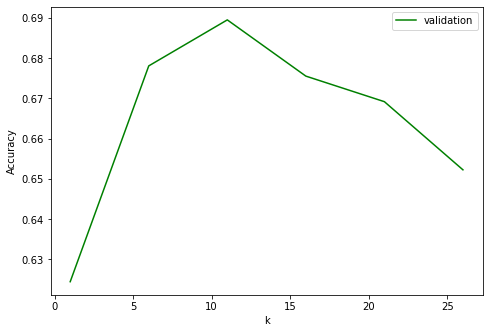

The highest performing k on validation data was: 11 with an accuracy of 0.6895286480383855
Validation Accuracy: 0.6841659610499576
The test accuracy was: 0.6841659610499576


In [30]:
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 1, 1])
ax.set_xlabel("k")
ax.set_ylabel("Accuracy")
plt.plot(k_range, acc, "-g", label="validation")
plt.legend(loc="upper right")
plt.show()

max_k = np.argmax(np.array(acc))
print("The highest performing k on validation data was: " + str(k_range[max_k]) + " with an accuracy of " + str(acc[max_k]))
print("The test accuracy was: " + str(knn_impute_by_user(sparse_matrix, test_data, k_range[max_k])))
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

In [31]:
acc = []
k_range = [1, 6, 11, 16, 21, 26]
for k in k_range:
    acc.append(knn_impute_by_item(sparse_matrix, val_data, k))

Validation Accuracy: 0.607112616426757
Validation Accuracy: 0.6542478125882021
Validation Accuracy: 0.6826136042901496
Validation Accuracy: 0.6860005644933672
Validation Accuracy: 0.6922099915325995
Validation Accuracy: 0.69037538808919


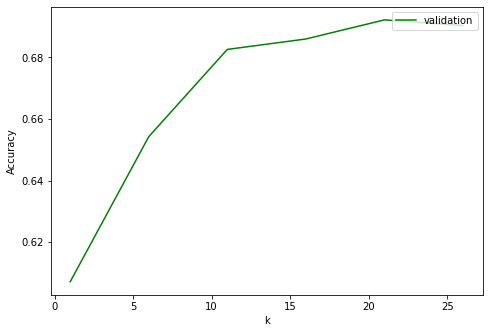

The highest performing k on validation data was: 21 with an accuracy of 0.6922099915325995
Validation Accuracy: 0.6816257408975445
The test accuracy was: 0.6816257408975445


In [33]:
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 1, 1])
ax.set_xlabel("k")
ax.set_ylabel("Accuracy")
plt.plot(k_range, acc, "-g", label="validation")
plt.legend(loc="upper right")
plt.show()

max_k = np.argmax(np.array(acc))
print("The highest performing k on validation data was: " + str(k_range[max_k]) + " with an accuracy of " + str(acc[max_k]))
print("The test accuracy was: " + str(knn_impute_by_item(sparse_matrix, test_data, k_range[max_k])))
